In [1]:
import os
import pickle
import numpy as np
import scipy.interpolate as spi
import matplotlib.pyplot as plt
%matplotlib inline

import flayer
import particle_evolution
import feo_thermodynamics as feot
import multiprocessing
import bulk_case_runner

# We have some annoying warnings - I think from llvm bug - fix then remove this
#import warnings
#warnings.filterwarnings("ignore")

## Testing convergence properties

What happens as we increase the number of layers?

I've picked a case that I know converges the CSD between 200 and 400 layers.

number of layers: 5
Inner core growth rate is 0.444 km/Myr
Max vf_ratio is 1.48e-09
Max extra O in liquid 3.34e-09 % O by mass
Particle radii between 0.00544 and 1.01e-05 m
Particle radii between 0.00544 and 1.01e-05 m


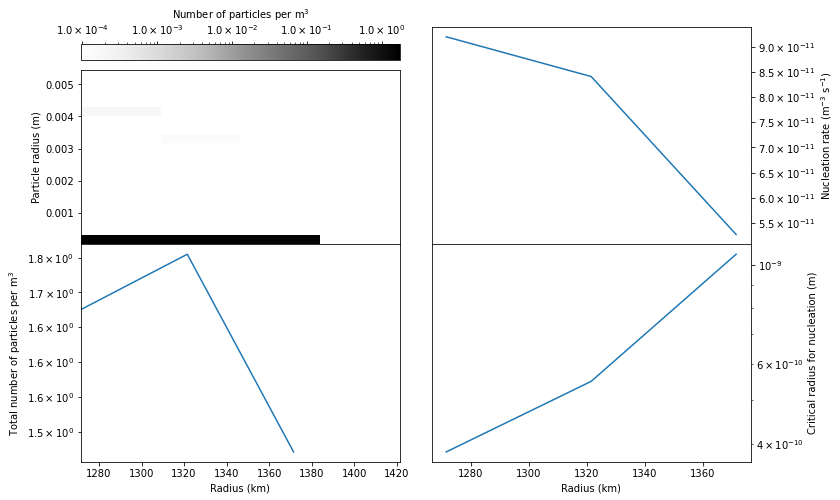

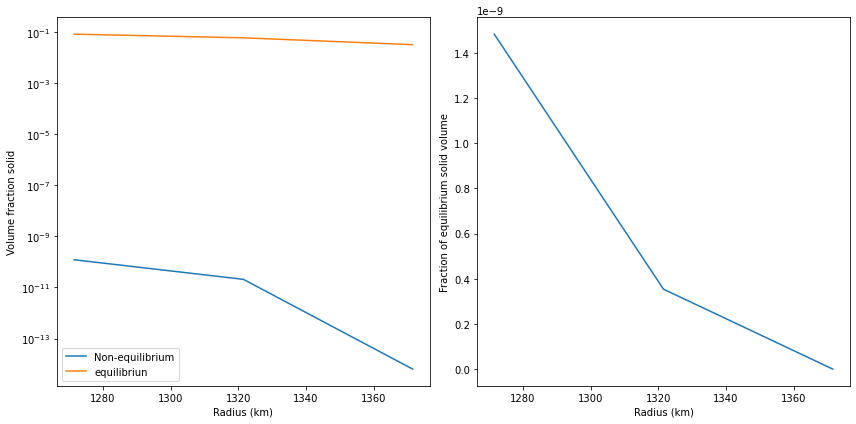


+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++



number of layers: 10
Inner core growth rate is 0.423 km/Myr
Max vf_ratio is 2.52e-09
Max extra O in liquid 6.47e-09 % O by mass
Particle radii between 0.00673 and 8.2e-06 m
Particle radii between 0.00673 and 8.2e-06 m


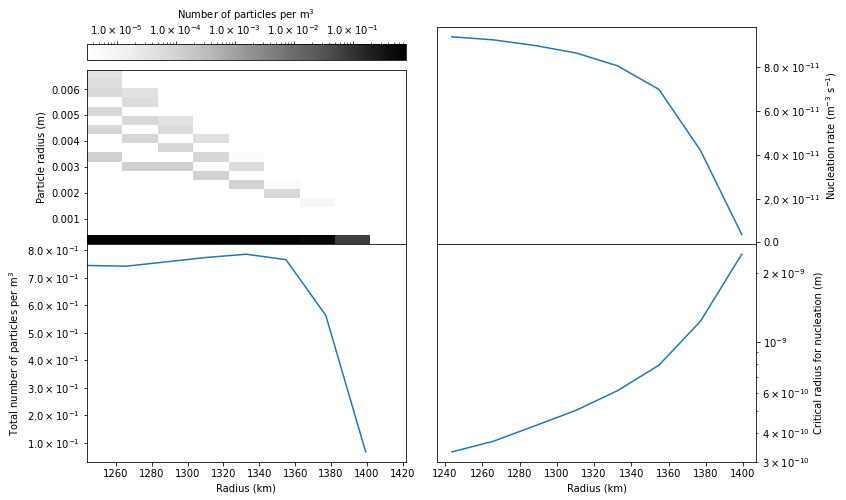

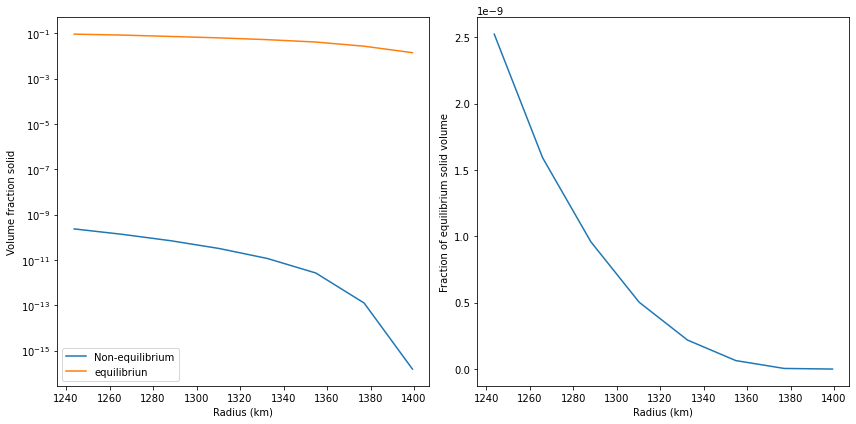


+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++



number of layers: 15
Inner core growth rate is 0.428 km/Myr
Max vf_ratio is 2.97e-09
Max extra O in liquid 7.94e-09 % O by mass
Particle radii between 0.00709 and 7.27e-06 m
Particle radii between 0.00709 and 7.27e-06 m


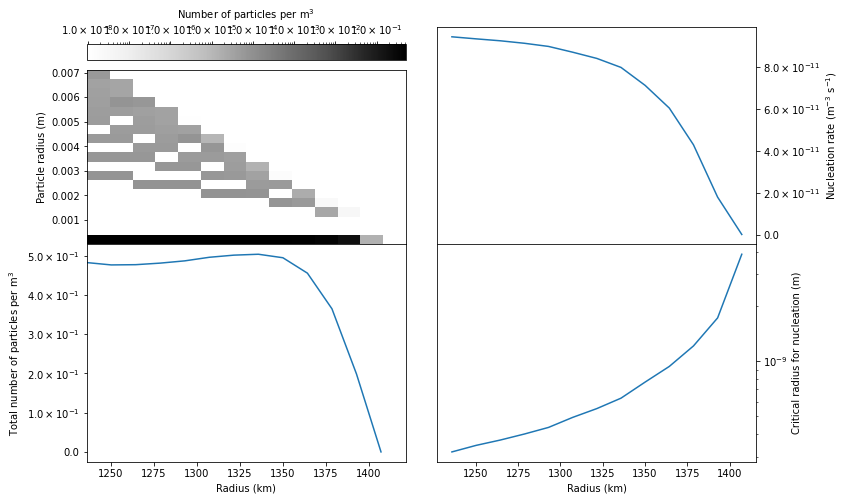

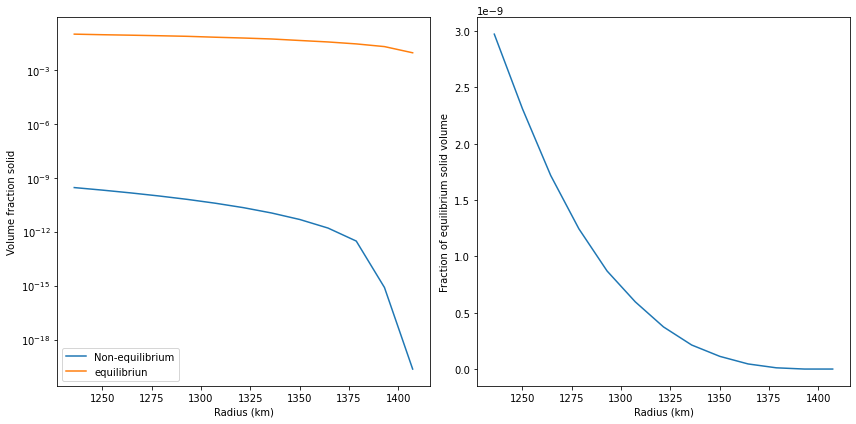


+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++



number of layers: 20
Inner core growth rate is 0.429 km/Myr
Max vf_ratio is 3.24e-09
Max extra O in liquid 8.62e-09 % O by mass
Particle radii between 0.00727 and 7.1e-06 m
Particle radii between 0.00727 and 7.1e-06 m


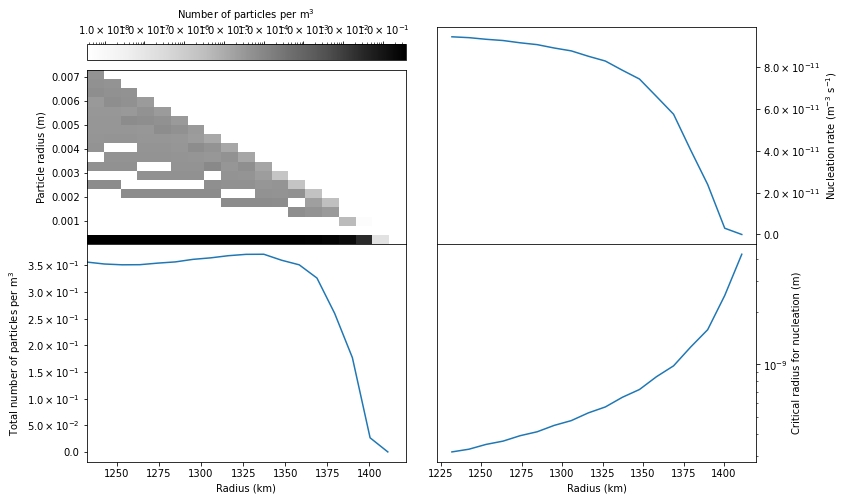

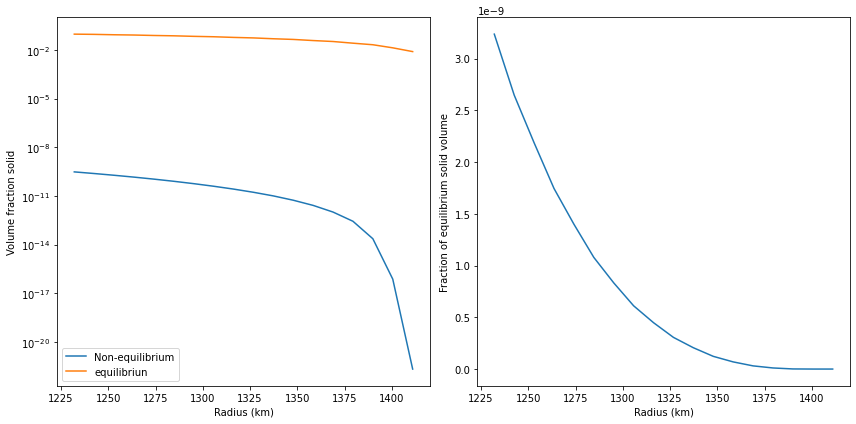


+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++



number of layers: 25
Inner core growth rate is 0.426 km/Myr
Max vf_ratio is 3.29e-09
Max extra O in liquid 8.98e-09 % O by mass
Particle radii between 0.00739 and 6.21e-06 m
Particle radii between 0.00739 and 6.21e-06 m


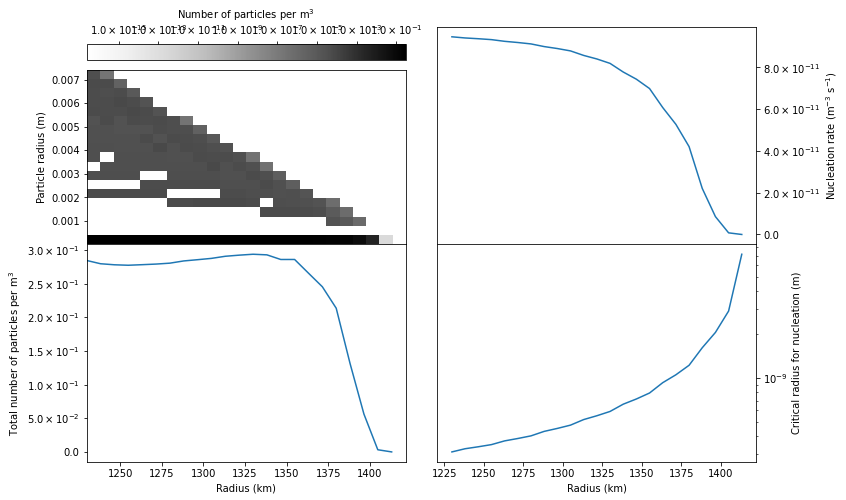

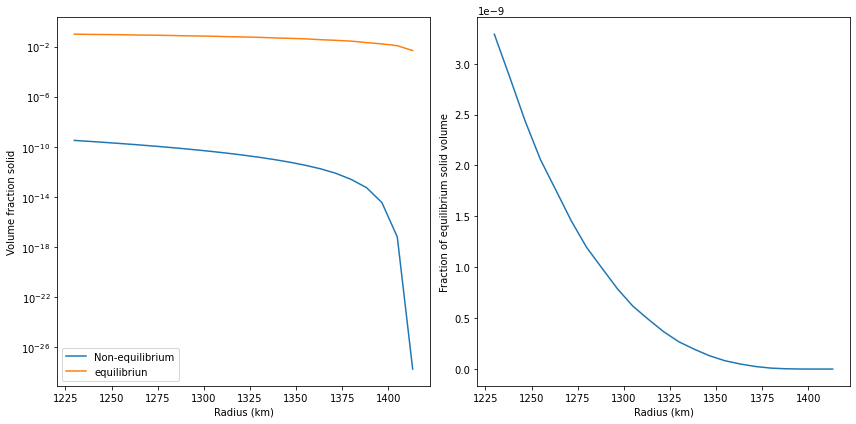


+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++



number of layers: 30
Inner core growth rate is 0.426 km/Myr
Max vf_ratio is 3.4e-09
Max extra O in liquid 9.24e-09 % O by mass
Particle radii between 0.00742 and 6.2e-06 m
Particle radii between 0.00742 and 6.2e-06 m


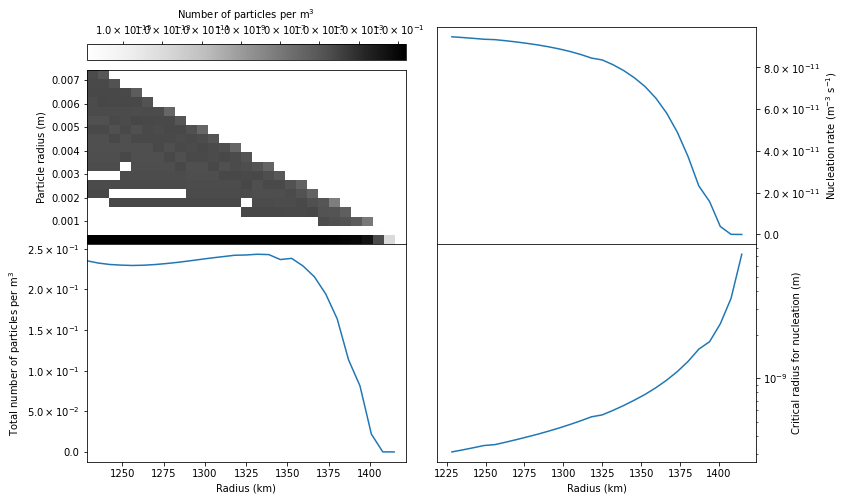

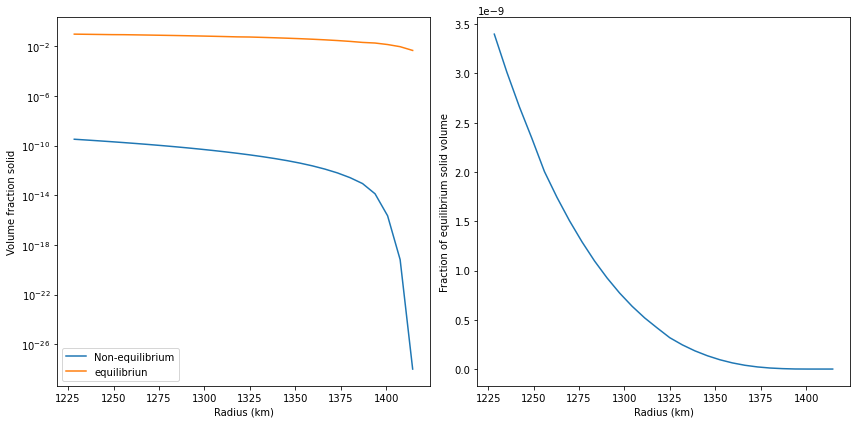


+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++



number of layers: 40
Inner core growth rate is 0.428 km/Myr
Max vf_ratio is 3.51e-09
Max extra O in liquid 9.65e-09 % O by mass
Particle radii between 0.00767 and 5.6e-06 m
Particle radii between 0.00767 and 5.6e-06 m


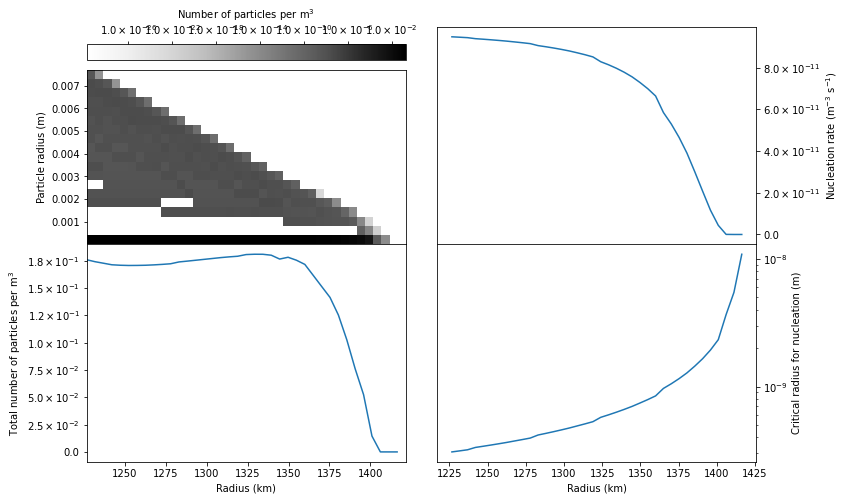

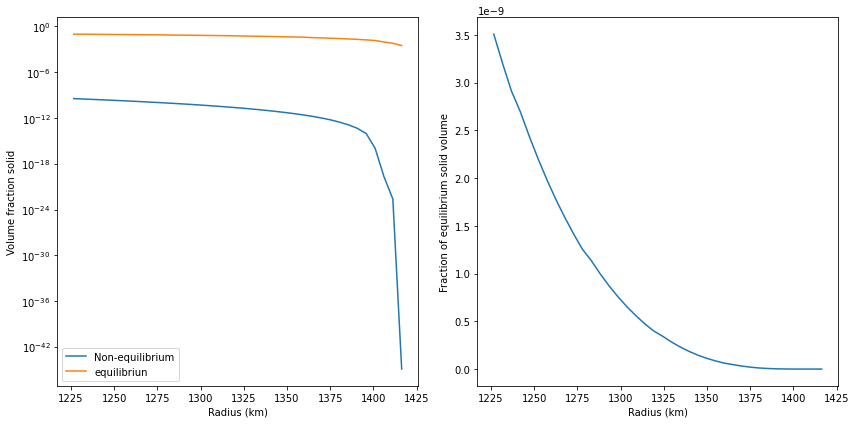


+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++



number of layers: 50
Inner core growth rate is 0.427 km/Myr
Max vf_ratio is 3.57e-09
Max extra O in liquid 9.85e-09 % O by mass
Particle radii between 0.00767 and 5.31e-06 m
Particle radii between 0.00767 and 5.31e-06 m


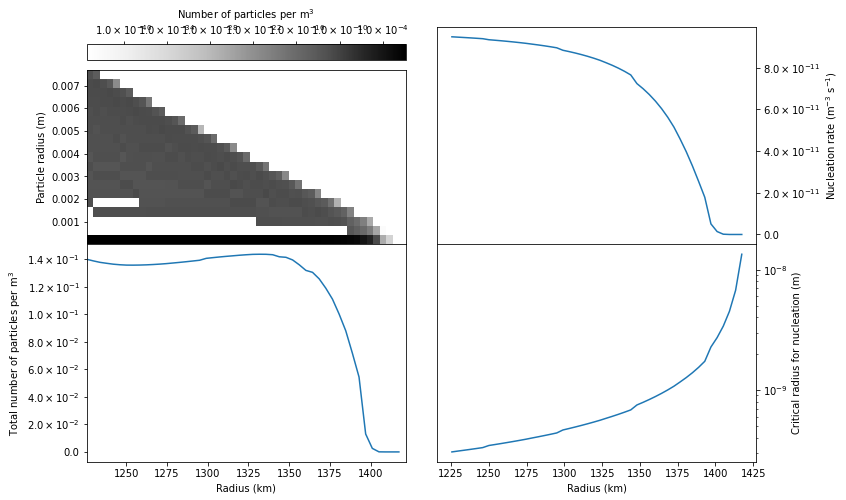

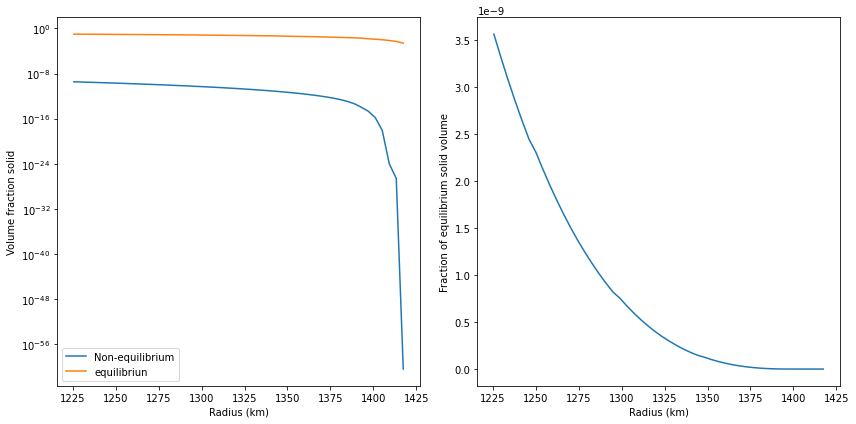


+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++



number of layers: 100
Inner core growth rate is 0.425 km/Myr
Max vf_ratio is 3.68e-09
Max extra O in liquid 1.02e-08 % O by mass
Particle radii between 0.00769 and 5.34e-06 m
Particle radii between 0.00769 and 5.34e-06 m


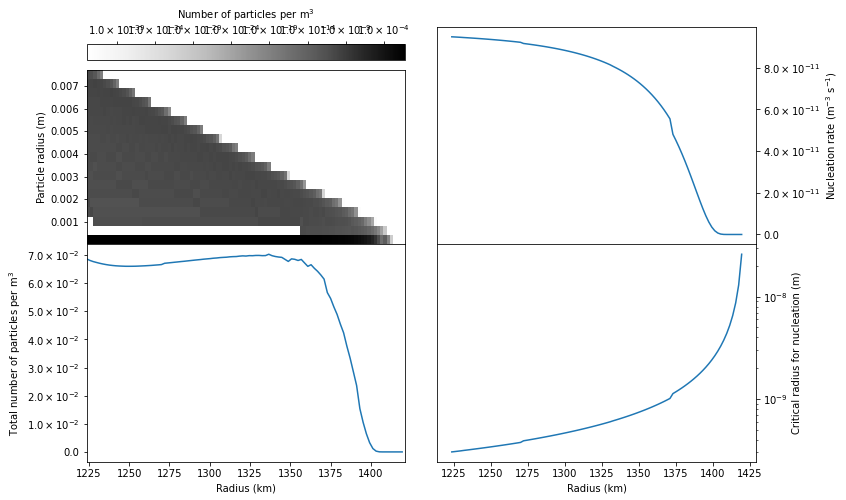

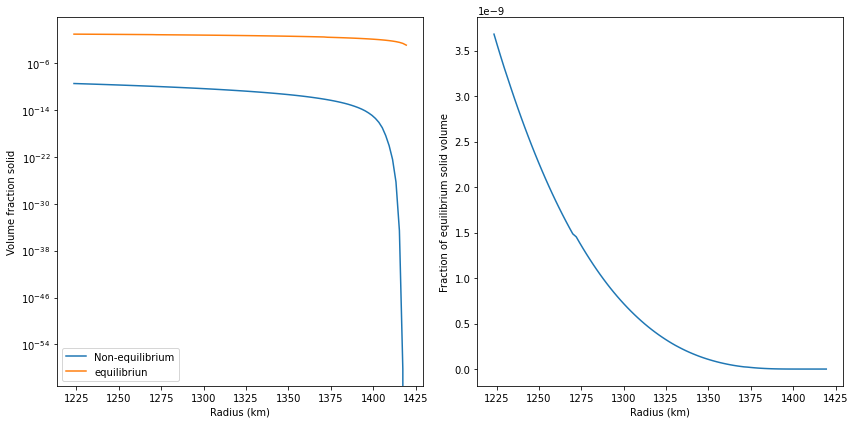


+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++



number of layers: 200
Inner core growth rate is 0.422 km/Myr
Max vf_ratio is 3.73e-09
Max extra O in liquid 1.04e-08 % O by mass
Particle radii between 0.0077 and 4.98e-06 m
Particle radii between 0.0077 and 4.98e-06 m


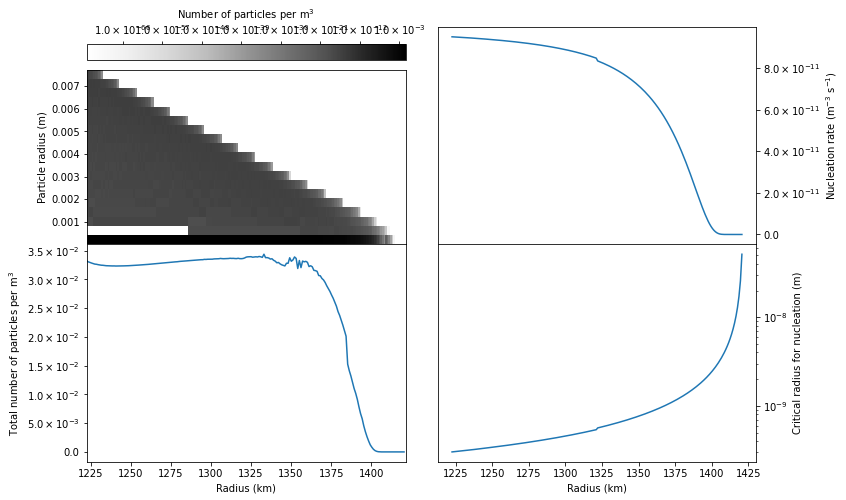

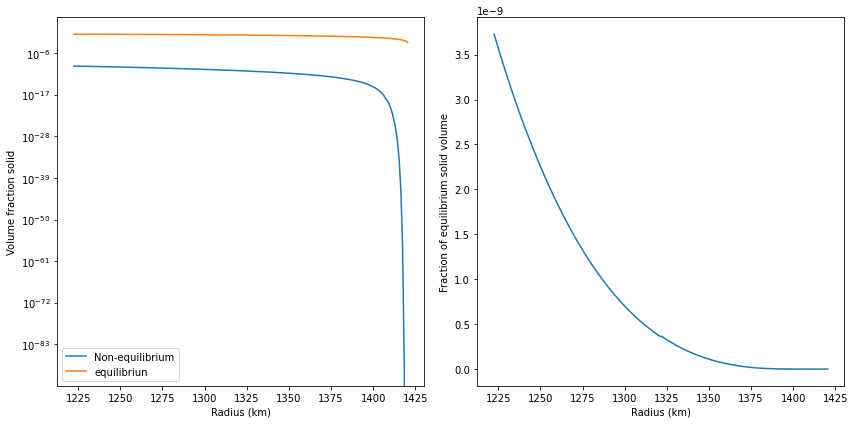


+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++



number of layers: 300
Inner core growth rate is 0.426 km/Myr
Max vf_ratio is 3.8e-09
Max extra O in liquid 1.05e-08 % O by mass
Particle radii between 0.00774 and 5.26e-06 m
Particle radii between 0.00774 and 5.26e-06 m


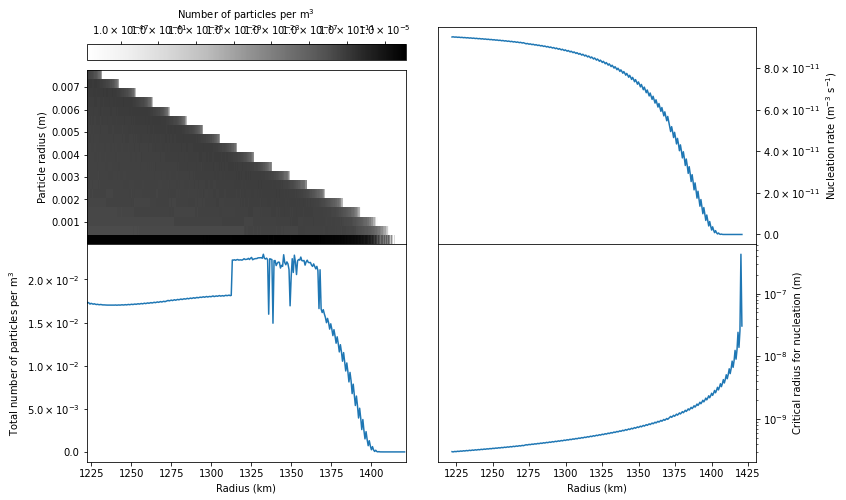

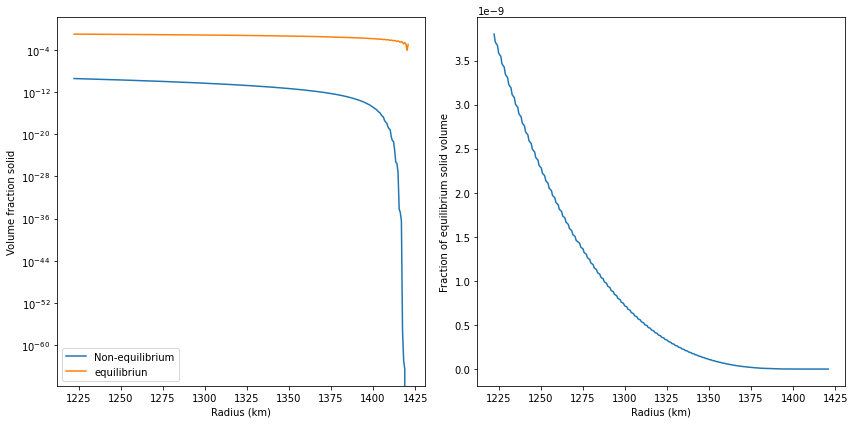


+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++



number of layers: 400
Inner core growth rate is 0.429 km/Myr
Max vf_ratio is 3.85e-09
Max extra O in liquid 1.07e-08 % O by mass
Particle radii between 0.00771 and 5.01e-06 m
Particle radii between 0.00771 and 5.01e-06 m


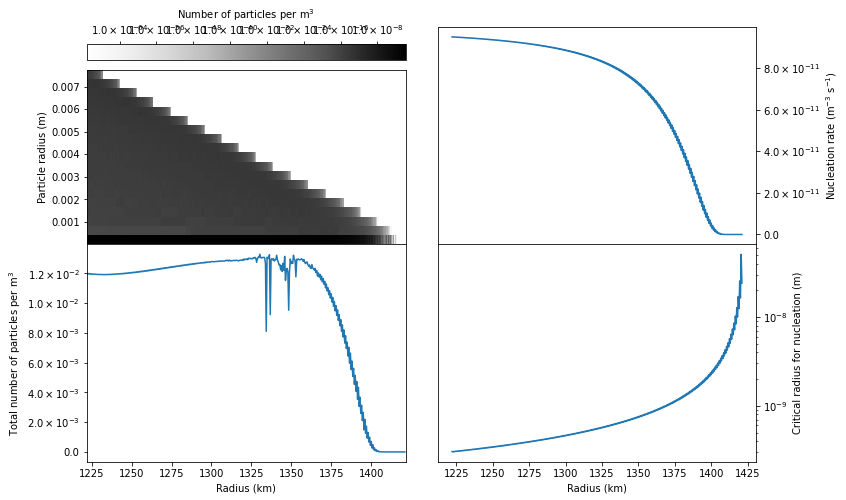

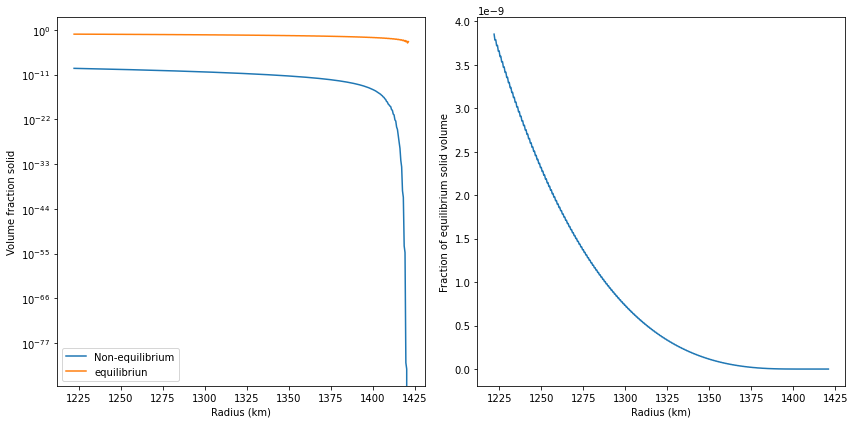


+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++



number of layers: 500
Inner core growth rate is 0.426 km/Myr
Max vf_ratio is 3.78e-09
Max extra O in liquid 1.06e-08 % O by mass
Particle radii between 0.00774 and 4.77e-06 m
Particle radii between 0.00774 and 4.77e-06 m


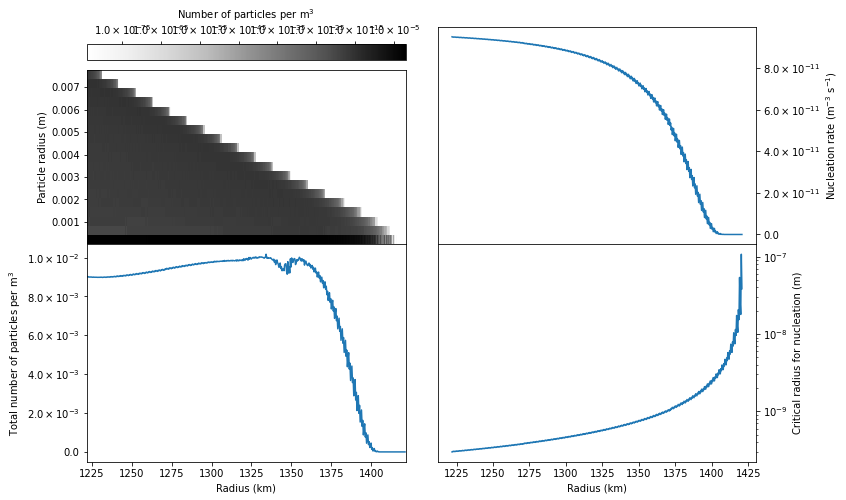

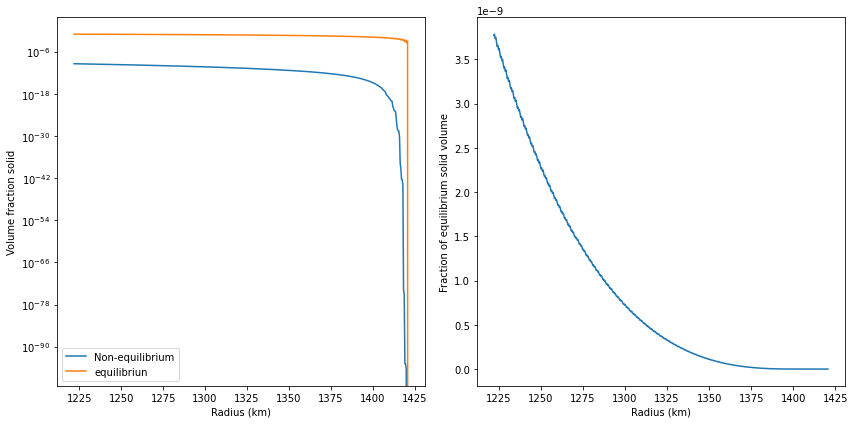


+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++



number of layers: 600
Inner core growth rate is 0.425 km/Myr
Max vf_ratio is 3.8e-09
Max extra O in liquid 1.06e-08 % O by mass
Particle radii between 0.00772 and 4.88e-06 m
Particle radii between 0.00772 and 4.88e-06 m


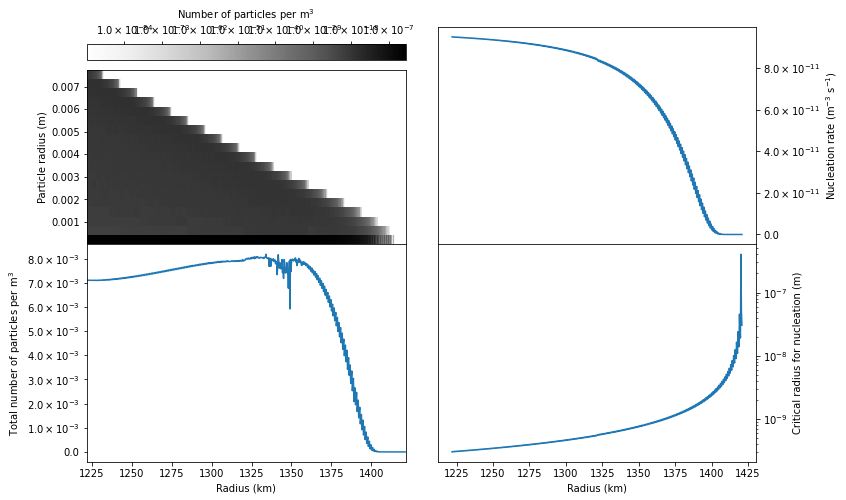

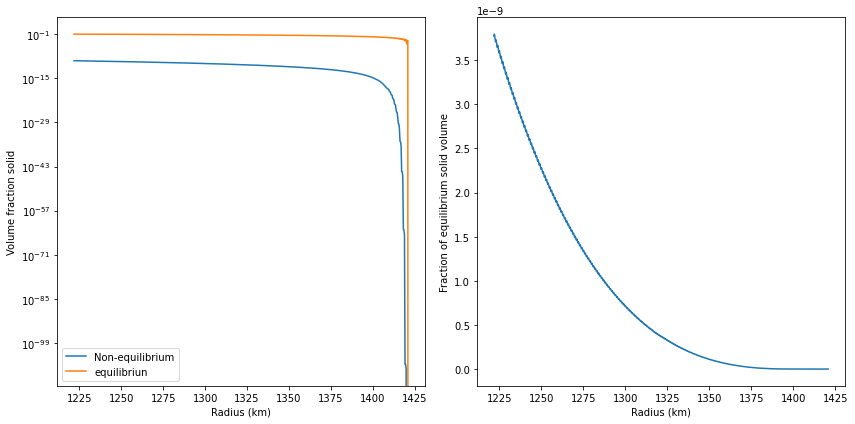


+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++





In [2]:
parameters = {'f_layer_thickness': 200.0E3,
              'delta_t_icb': 10.0,
              'xfe_outer_core': 0.95,
              'xfe_icb': 0.95,
              'growth_prefactor': 150.0,
              'chemical_diffusivity': 1.0E-10,
              'kinematic_viscosity': 1.0E-6,
              'i0': 1.0E-10,
              'surf_energy': 1.08E-2, 
              'number_of_analysis_points': 500,
              'r_icb': 1221.5E3, 
              'r_cmb': 3480.0E3,
              'gruneisen_parameter': 1.5}


# num_layers
n_layers_list = [5, 10, 15, 20, 25, 30, 40, 50, 100, 200, 300, 400, 500, 600]
# Output lists
max_vf_ratio = []
icb_flux = []
max_particle_size = []
max_excess_oxygen_mass = []

# Just do runs in serial
for i, n_layers in enumerate(n_layers_list):
    
    parameters['number_of_analysis_points'] = n_layers
    
    filename = f"cases/convergence/{n_layers}_layers.pickle"
    
    if os.path.exists(filename):
        # We have this model run on disk. Just read...
        data = bulk_case_runner.load_case_data(filename)    
    else:
        # Run this model case
        data = bulk_case_runner.run_flayer_case(parameters, filename)
    
    print(f"number of layers: {data['number_of_analysis_points']}")
    print(f"Inner core growth rate is {data['growth_rate']:.3g} km/Myr")
    print(f"Max vf_ratio is {np.nanmax(data['vf_ratio']):.3g}")
    max_extra_o = np.max(feot.mass_percent_o(data["opt_xl"]) -  feot.mass_percent_o(data["xfe_outer_core"]))
    print(f"Max extra O in liquid {max_extra_o:.2e} % O by mass")
    max_particle_radius = data["particle_radii"][data["particle_radii"] > 0.0].max()
    min_particle_radius = data["particle_radii"][data["particle_radii"] > 0.0].min()
    print(f"Particle radii between {max_particle_radius:.3g} and {min_particle_radius:.3g} m")

    max_vf_ratio.append(np.nanmax(data['vf_ratio']))
    icb_flux.append(data["growth_rate"])
    max_particle_size.append(max_particle_radius)
    max_excess_oxygen_mass.append(max_extra_o)

    bulk_case_runner.plot_case_csd_nuc(logscale=True, nonuc=False, **data)
    bulk_case_runner.plot_case_solid_frac(**data)
    print("\n+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++\n\n\n")
    


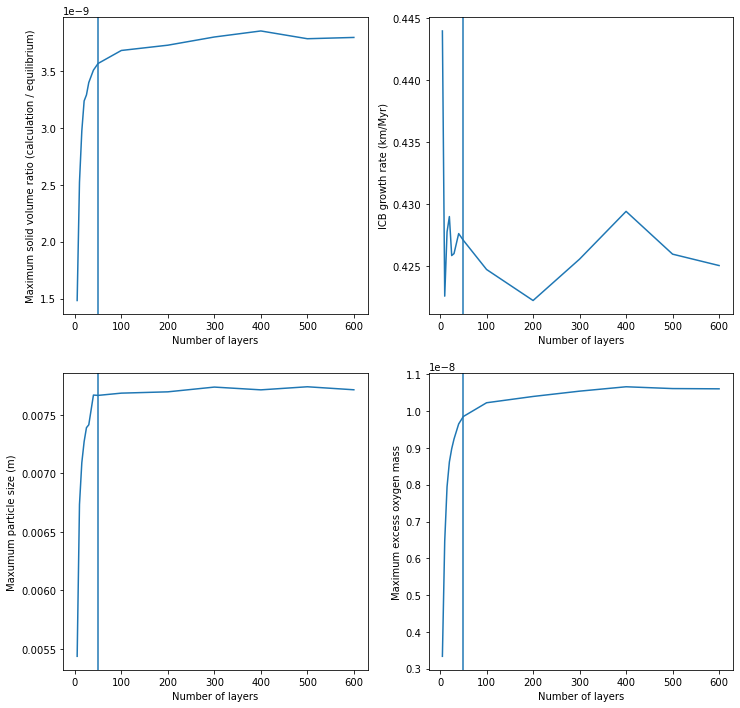

In [3]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(12,12))
axs[0,0].plot(n_layers_list, max_vf_ratio)
axs[0,0].set_xlabel('Number of layers')
axs[0,0].set_ylabel('Maximum solid volume ratio (calculation / equilibrium)')
axs[0,0].axvline(50)

axs[0,1].plot(n_layers_list, icb_flux)
axs[0,1].set_xlabel('Number of layers')
axs[0,1].set_ylabel('ICB growth rate (km/Myr)')
axs[0,1].axvline(50)

axs[1,0].plot(n_layers_list, max_particle_size)
axs[1,0].set_xlabel('Number of layers')
axs[1,0].set_ylabel('Maxumum particle size (m)')
axs[1,0].axvline(50)

axs[1,1].plot(n_layers_list, max_excess_oxygen_mass)
axs[1,1].set_xlabel('Number of layers')
axs[1,1].set_ylabel('Maximum excess oxygen mass')
axs[1,1].axvline(50)

plt.show()